M1 biostatistic <br/>
May, 2020
*********************

# <center>Project chaoseverywhere</center>

Author : 

# Table of Contents 
1. [The logistic function]<br/>
    1.1 [The definition]<br/>
    1.2 [The bifurcation]<br/>
2. [The sparse matrix]<br/>
    

# 1. The logistic function
## 1.1 The definition

To create the logistic function, we need some packages.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

The logistic function is a second order's recursive sequence : $x_{n+1}=rx_n(1-x_n)$, $r\in[0,4]$.
We can also write this function without sequences : $f(x)=rx(1-x)$.

An example with `r = 1.9`, `x0 = 0.01` and `iterations = 100`.        

In [2]:
def logistic(r, x):
    """ This function calculates values of the logisitc function.

    :param r: the common ratio
    :type r: float
    :param x: the value of the research point
    :type x: float
    :return: the logistic value of x
    :rtype: float
    """
    return(r*x*(1-x))

We have the function that calculate the image of the logistic function. Now, we draw the (y=x) straight line and trace the logistic sequence.

In [3]:
def logistic_draw(x0, r, iteration, points):
    """ This function is a first way to be able to draw the logistic sequence.
    It draws the logistic function, the (y=x) line. With these lines, the logistic sequence can be drawn.

    :param x0: the starting point included in [0,1] 
    :type x0: float
    :param r: the common ratio
    :type r: float
    :param iteration: the number of iteration to draw these lines
    :type iteration: integer
    :param points: the number of points between 0 and 1 on the x-axis
    :type points: integer
    :return: the curves (y=x) and logistic function with the creation of the logistic sequence
    :rtype: plot the graph
    """
    x = np.linspace(0, 1, points)
    plt.figure()
    plt.plot(x, logistic(r, x))
    plt.plot(x, x)
    for _ in range(iteration):
        f_x0 = logistic(r, x0)
        plt.plot([x0, x0], [x0, f_x0],
                 color='red', alpha=0.3)  # vertical stairs
        plt.plot([x0, f_x0], [f_x0, f_x0],
                 color='red', alpha=0.3)  # horizontal stairs
        plt.plot([x0, f_x0], [f_x0, f_x0], 'o',
                 color='grey', alpha=0.4)  # intersections
        x0 = f_x0
    plt.show()

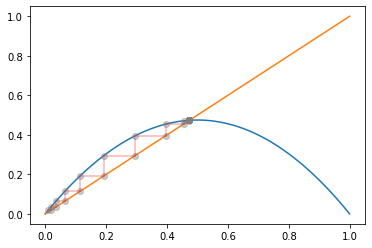

In [10]:
logistic_draw(0.01, 1.9, 100, 100)

An other exemple with `r= 3.6`.

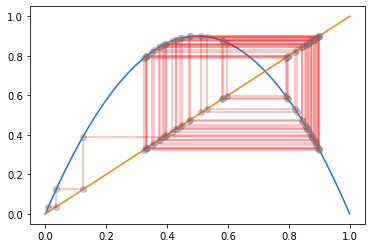

In [11]:
logistic_draw(0.01, 3.6, 50, 100)

We observe that the chaotic diagram happens when the coefficient `r` is superior or equal to 3.57

To prove that it's really this coefficient, we add a widget. With this widget, we can change the value of `r` and see the corresponding graph. 

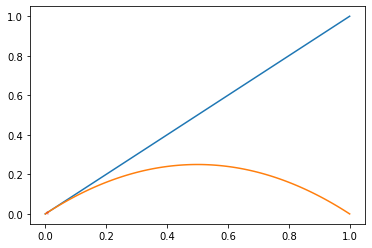

<function __main__.plot_logi(x0, r, nb_iter=100, linsdim=100)>

In [24]:
def logi_branch_points(x0, r, nb_iter=100):
    points = [(x0,0)]
    for i in range(nb_iter):
        f_x0 = logistic(r, x0)
        points.append((x0,f_x0))
        points.append((f_x0,f_x0))
        x0 = f_x0
    return points

def plot_logi(x0, r, nb_iter=100, linsdim=100):
    x,y=zip(*logi_branch_points(x0, r, nb_iter))
    vals = np.linspace(0,1,linsdim)
    plt.figure()
    plt.plot(vals,vals)
    plt.plot(vals, logistic(r, vals))
    plt.plot(x,y,'k',color='red', alpha=.3)
    plt.show()
    

interact(plot_logi, x0=fixed(0.01), r=widgets.FloatSlider(min=1, max=4, step=0.001, continuous_update=False),
         nb_iter=widgets.IntSlider(min=10, max=150, step=10, value=60),
         linsdim=fixed(100))

## 1.2 The bifurcation

The bifurcation uses the logistic function. </br>
Actually, the bifurcation is a repetition of logistic sequence points. We begin the sequence with a random number. Then, we apply the logistic sequence (here, we will chose 500 times) to find another points. We repeat this loop five times. <br/>
This is the getting graph.

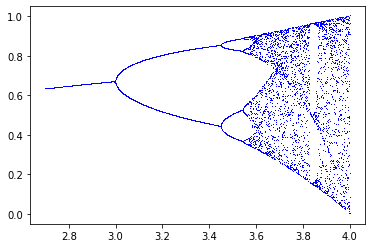

In [26]:
r = np.linspace(2.7, 4, 10000)
x = []
y = []
for i in r:
    x.append(i)
    x0 = np.random.random()
    for _ in range(500):
        x0 = logistic(i, x0)
    y.append(x0)
plt.plot(x, y, ls='', marker=',', color='blue')
plt.show()
    

The first bifurcation happens at `r=3`, the secund at roughly `r=3.45`, etc...

# 2. The sparse matrix

Before starting, we need other packages :

In [1]:
from scipy.sparse import coo_matrix
import scipy.sparse as sparse

A sparse matrix is a matrix holding many zeros. Without using sparse_matrix function of scipy, we have, for exemple, this qparse matrix.

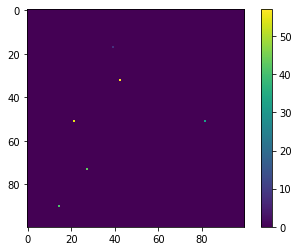

In [4]:
n=100
x = np.zeros(n)
y = np.zeros(n)
tab = np.zeros(n)
for i in range(int(n/16)):
    tab[i] = np.random.randint(1,n)
    x[i] = np.random.randint(1,n)
    y[i] = np.random.randint(1,n)
data = np.array(tab)
row = np.array(x)
col = np.array(y)
plt.imshow(coo_matrix((data, (row, col)), shape = (n, n)).toarray())
plt.colorbar()

Here, we've randomly put a random number (different of 0) in `int(n/16)` cases, where n is the size of the matrix.

Now, we use the sparse_matrix function of scipy. We just need to give some elements as the size of the matrix and the density of 1 in this matrix. The function gives us the corresponding sparse matrix.

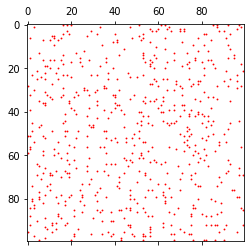

In [5]:
def sparse_matrix(wi, leng, den):
    """This function creates a sparse matrix.
    It uses random number to place the values (non-null values).

    :param wi: the width of the matrix
    :type wi: integer
    :param leng: the length of the matrix
    :type leng: integer
    :param den: density of non-null number in the matrix
    :type den: float
    :return: The representation of a sparse matrix
    :rtype: matplotlib plot
    """
    sp_mat = sparse.random(wi, leng, den)
    plt.spy(sp_mat, markersize=1, mfc='purple', marker='p', mec='red')

    
sparse_matrix(wi=100, leng=100, den=1/16)